In [19]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import pathlib
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Dense, Input

In [21]:
data_dir = pathlib.Path("D://archive//cars_train")

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)


Found 2787 files belonging to 3 classes.
Using 2230 files for training.
Found 2787 files belonging to 3 classes.
Using 557 files for validation.


In [22]:
class_names = train_ds.class_names
print(class_names)

['back', 'front', 'side']


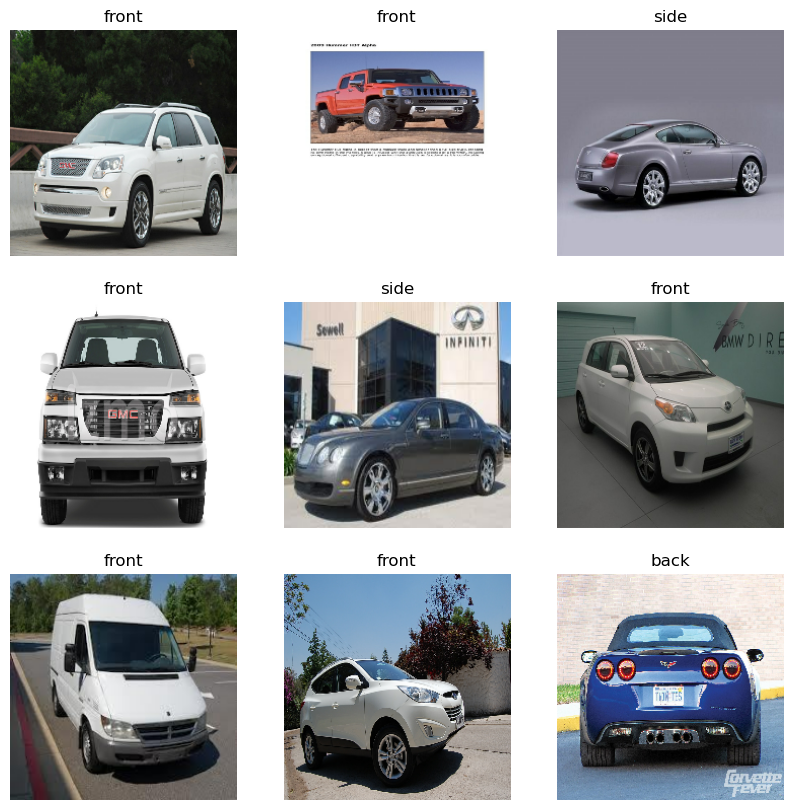

In [23]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [26]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [27]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [28]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [35]:
num_classes = 3

model = tf.keras.Sequential([
    Input(shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  
])

In [37]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),  
  metrics=['accuracy']
)

In [39]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30
)

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 368s 5s/step - accuracy: 0.5294 - loss: 105.8641 - val_accuracy: 0.6050 - val_loss: 0.9978
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 374s 5s/step - accuracy: 0.6627 - loss: 0.8406 - val_accuracy: 0.6068 - val_loss: 1.0124
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 510s 7s/step - accuracy: 0.8011 - loss: 0.5212 - val_accuracy: 0.5853 - val_loss: 1.0994
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 442s 6s/step - accuracy: 0.8741 - loss: 0.3573 - val_accuracy: 0.5996 - val_loss: 1.4023
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 449s 6s/step - accuracy: 0.9220 - loss: 0.2369 - val_accuracy: 0.5978 - val_loss: 1.9763
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 540s 8s/step - accuracy: 0.9331 - loss: 0.1994 - val_accuracy: 0.6104 - val_loss: 3.0099
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 573s 8s/step - accuracy: 0.9360 - loss: 0.1916 - val_accuracy: 0.6014 - val_loss: 3.2638
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 406s 6s/step - accuracy: 0.9709 - loss: 0.0876 - val_accuracy: 0.6014 -

In [71]:
test_data_dir = pathlib.Path('D://archive//cars_test')
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    image_size=(224, 224),  
    batch_size=32,          
    shuffle=True           
)

test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc}")

Found 185 files belonging to 3 classes.
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 542ms/step - accuracy: 0.5699 - loss: 3.5391
Test accuracy: 0.5351351499557495


In [73]:
predictions = model.predict(test_ds)
predicted_classes = tf.argmax(predictions, axis=1)
print(predicted_classes)

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 567ms/step
tf.Tensor(
[1 0 1 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 2 2 1 1 0 1 2 1 1 1 2 1 2 1 2 0 1
 1 2 1 1 1 1 1 2 1 1 1 1 0 1 1 1 1 2 1 1 1 2 2 2 2 2 1 1 1 1 1 1 2 1 1 2 1
 1 1 1 1 0 1 1 2 1 1 1 0 2 0 1 1 0 2 1 0 2 1 2 1 2 1 1 2 2 2 1 1 1 1 0 1 1
 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 0 1 1 1 1 0 1 1 1 1 1 2 2 0 1
 2 1 1 1 1 2 1 1 0 2 2 2 1 1 1 1 1 2 2 0 0 1 1 0 1 1 1 2 1 1 1 0 1 0 2 1 1], shape=(185,), dtype=int64)


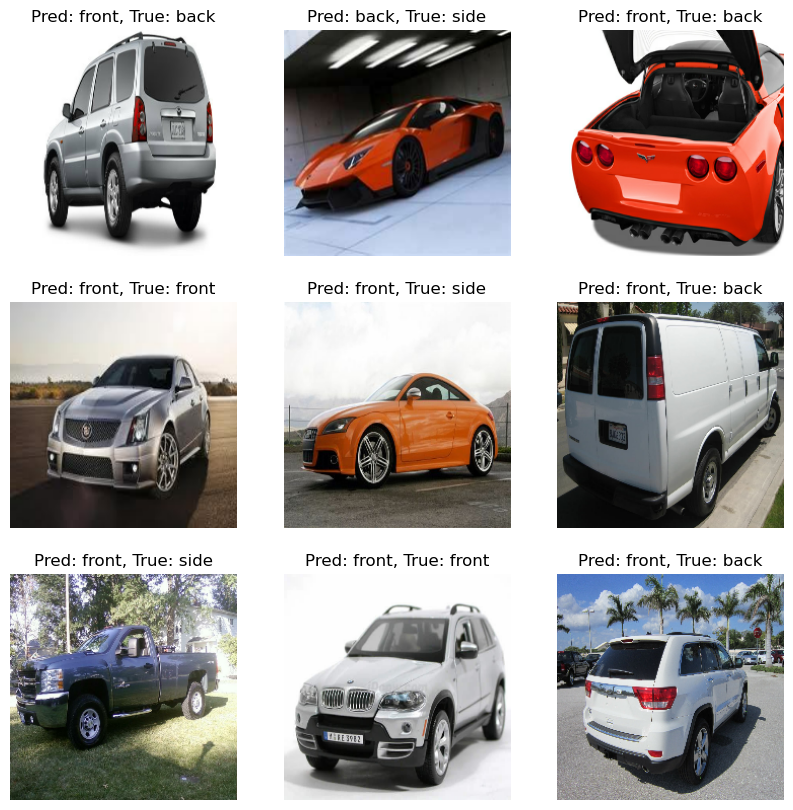

In [74]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f"Pred: {class_names[predicted_classes[i]]}, True: {class_names[labels[i]]}")
    plt.axis("off")